Homework is based on `Classification and Regression Trees` Chapter

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.externals.six import StringIO  
from six import StringIO

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, precision_score, accuracy_score

%matplotlib inline
plt.style.use('seaborn-white')

## Question 1 (Theoretical)

Suppose we produce ten bootstrapped samples from a data set containing `Red` and `Green` classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of $P(\text{Class in Red}| X)$ :
$$ 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75 $$
There are two common ways to combine these results together into a single class prediction.

1. Based on the `majority vote` approach discussed in the lecture. 
2. Based on the `maximum average probability`. 

In this example, what is the final classification of X under each of these two approaches? 

- 1 
    to more easily explain the majority vote approach we can write the same array as the one above but now we actually classify based on each probaility and wrtie it down so we have $$ green, green, green, green, red, red, red, red, red, red $$ from here we can see that the majority of the class predictions are red thus the combined class prediction is red  
    
- 2 with the maximum average probability we can simply take the average probabilities and make that value our combined probability. the average of these values is .45 meaning the class prediction is green 

## Question 2 (Theoretical)

Sketch both the answers by your hand by pen and paper (or you can use ipad or surface pro if you have one) and upload the screenshot on this python notebook. The screenshot should be clear and visible.

1. Sketch the tree by your hand corresponding to the partition of the predictor space illustrated in the Figure below. The numbers inside the boxes indicate the mean of Y within each region.

<img src="Q2-partition.png" > 


2. Create a partition similar to the diagram above corresponding to the tree illustrated below. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

<img src="Q2-trees.png" > 


- 1 
    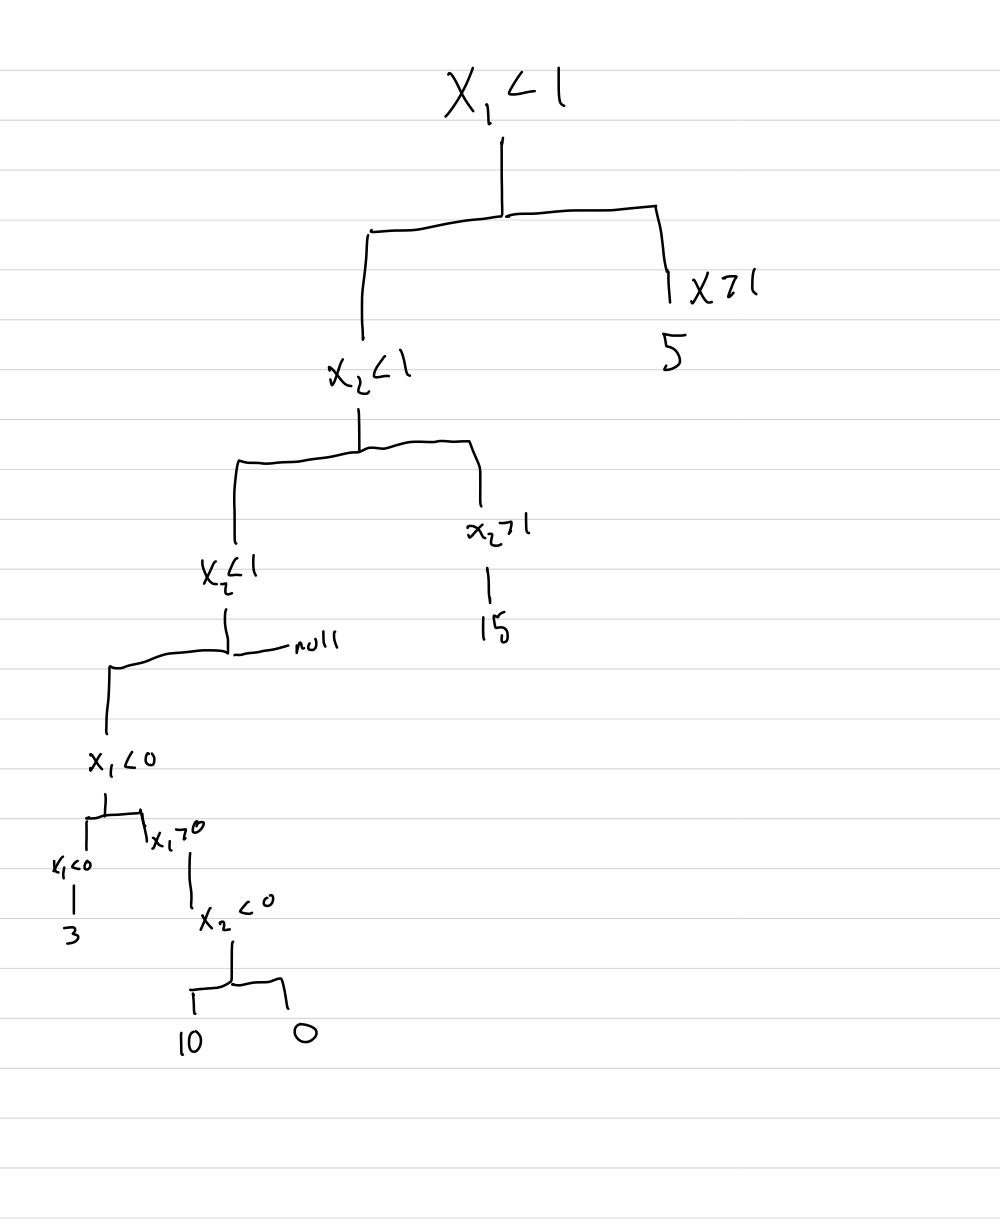

- 2
    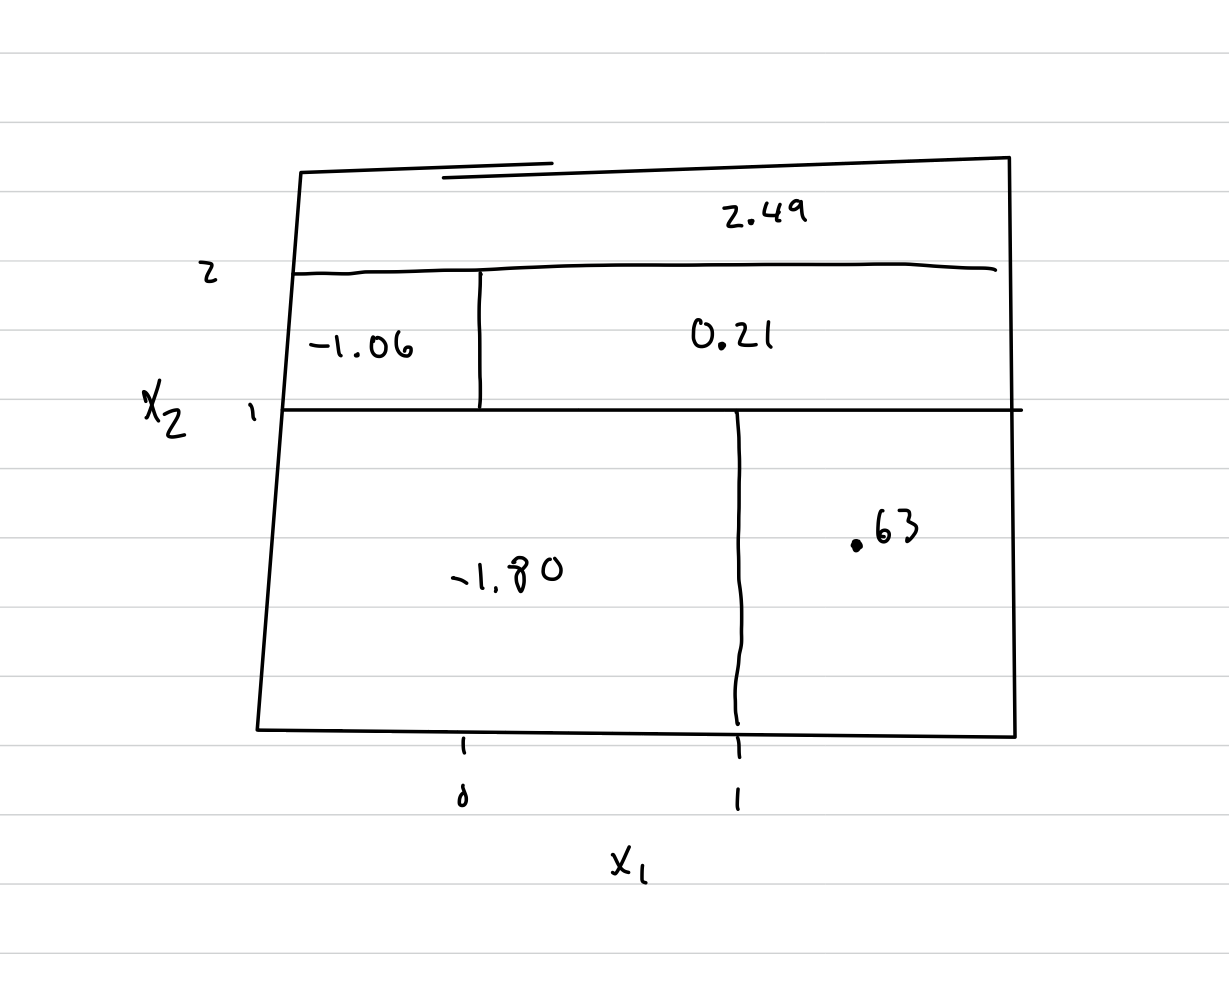

## Question 3 (Theoretical) 
dont know if this question was meant to have data attched to it

1. Calculate the `Gini index` and the `Entropy Index` for the following split. 


2. Suppose we have 50 red, 50 blue and 50 green points. Caluculate an approximate value of gini index for each partition for the three scenarios: 

a). $Gini(R)$
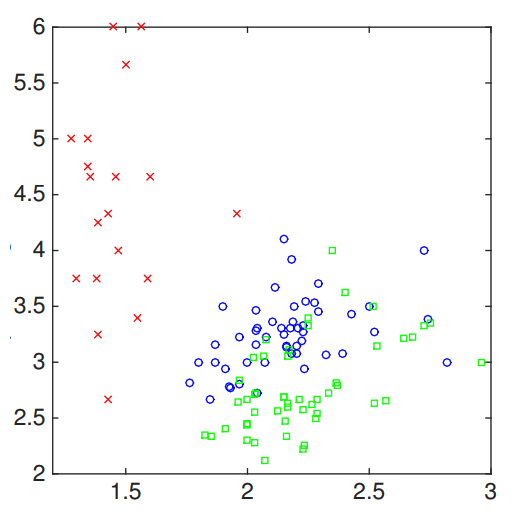

b). In this sceranio all the 49 red points are in R1, 1 red point in R2 and rest are in R2. $Gini(R_1)$ and $Gini(R_2)$
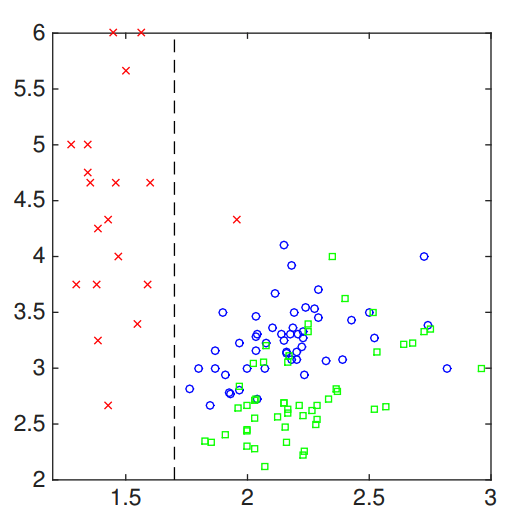

c). In this sceranio all the 49 red points are in R1, 1 red point in R2, 45 blue points in R2 and 18 green points in R2 and rest are in R3. Find $Gini(R_1)$, $Gini(R_2)$ and $Gini(R_3)$
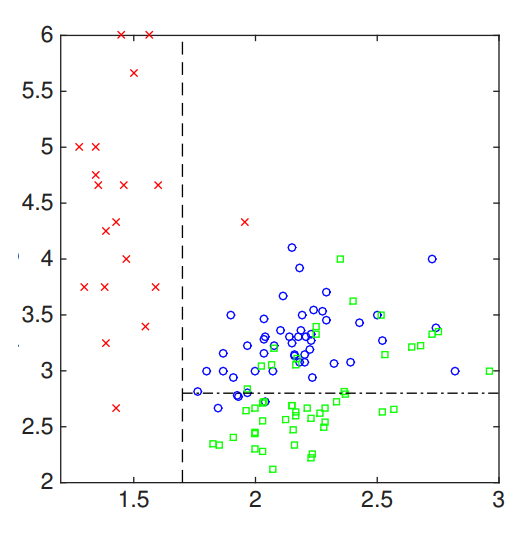

3. Sketch by your hand the tree corresponding to the best partition in 2 and attach the screen shot here. Darwing and screenshot should be clear. 

 - a
      for this situation there is no partitions or splits being made so the purity of the splits and we are interrested in the Gini(r) using the equation $g = \sum{p_{rk} * (1 - P_{rk})}$ and since the proportion of each class is the same for the region we can simply multiply $1/3 * (1 - 1/3) * 3$ and get GINI(R) = 2/3 = .666 , for the Entropy we can look at the equation $- \sum{P_{rk} * \log{P_{rk}}}$ with the same proportions for each class . this turn out to be .47712. meaning this region is pretty unpure .
      
- b
    using the same equations the $Gini(r_1)$ is 0 since all obs in this rth region are from 1 class , $Gini(r_1)$ ' s entropy is also 0 for simular reasons $Gini(r_2)$ is goign to be .50975 which is almost as unpure as possible . Entropy for $r_2$ = .3221728

- c
    again the Gini and entropy of the $R_1$ region is going to be 0 . the gini and entropy for $R_2$ are going to be .740721 and .29071953 respectively . Gini and entropy for $R_3$ is going to be .233747 and .1719949 respectively

## Question 4 (Programming)

This problem involves the `OJ` data set.  We map two qualitative variables, `Store7` and `Purchase` to binary intergers (0,1) in the given code. Use the binary version in classification.

1. Create a training set containing a random sample of 75\% of observations, and a test set containing the remaining observations. 

2. Fit a tree to the training data, with `Purchase` as the response and the other variables as predictors.

2.  What is the `training error` rate?

4.  Predict the response on the test data, and produce a `confusion matrix` comparing the test labels to the predicted test labels. 

4. What is the `test error` rate? 

5. Apply the `10-fold cross validation`  to the data set in order to determine the optimal tree size `max_leaf_node`.

6. Produce a plot with tree size (`max_leaf_node`) on the x-axis and cross-validated classification error rate on the y-axis. 

7. Which tree size (`max_leaf_node`) corresponds to the lowest cross-validated classification error rate? 

8. Produce a `pruned tree` corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with `five terminal nodes`. 

9. Compare the training error rates between the pruned and unpruned trees. Which is higher? 

10. Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [54]:
OJ = pd.read_csv('OJ.csv').dropna()
OJ['Store7']   = OJ['Store7'].map({'Yes': 1, 'No': 0})
OJ['Purchase'] = OJ['Purchase'].map({'CH': 1, 'MM': 0})
#purchase is the response and its binary so classification tree needed 
X = OJ.drop('Purchase', axis=1).to_numpy()
y = OJ.Purchase.to_numpy()

#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=2)

#goiing to fit a classification tree with an arbitrary number of end nodes there are 17 features 
rffIt = RandomForestClassifier()
rffIt.fit(X_train,y_train)
#train error rate
rffIt.score(X_train,y_train) #0.8052434456928839

#test error rate
rffIt.score(X_test,y_test)#0.7359900373599004
XtestPred = rffIt.predict(X_test)
#making sure to import the needed packs
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#confusion matrix 
confusion_matrix(y_test,XtestPred )# (97+72) / (224+410) = .2786624 = 1 - .2786624= #0.72133758

#cross validation

rffitscore = cross_val_score(rffIt, X, y, cv=10, scoring= 'roc_auc' )

#finding optimal node count
from sklearn.model_selection import RandomizedSearchCV

max_features = [int(x) for x in np.linspace(2, 51, num = 50)]
max_features.append(None)

random_grid = {
 'max_features': max_features
 }


randomtreemod = RandomizedSearchCV(estimator = rffIt, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)


# Fit the model
randomtreemod.fit(X_train, y_train)


print(randomtreemod.best_params_)

#max_leaf_node doesnt work for me and after reasearcching the 'classifier__max_leaf_nodes' param doesn work either

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 51 is smaller than n_iter=100. Running 51 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 10 folds for each of 51 candidates, totalling 510 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.1s


{'max_features': 17}


[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:    4.6s finished


## Question 5 (Programming)

For question number 4, apply the following Classification tools and calculate the 10-fold CV test error. 

1. Bagging 
2. Random forest with $m = \sqrt{p}$ 
3. Support Vector Machine with radial kernel and C = 1000
4. logistic regression 


Plot the 10-fold cross-validation test error for every Classification tools mentioned above inlcuding the pruned Decision tree from Question 4. How accurate are the results compared to simple method like logistic regression? Which of these approaches yields the best performance ?

In [58]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
np.mean(1 - cross_val_score(bag,X_train, y_train, cv=10, scoring= 'roc_auc'))

0.16180101670297747

In [59]:
Rf = RandomForestClassifier(max_features = "sqrt", max_leaf_nodes = 10)
Rf.fit(X_train, y_train)
np.mean(1 - cross_val_score(Rf,X_train, y_train, cv=10, scoring= 'roc_auc'))

0.12954248366013071

In [62]:
from sklearn import svm

svc = svm.SVC(C= 1.0, kernel='linear')
svc.fit(X_train, y_train)
-np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

0.17383177570093458

In [64]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(solver='newton-cg')
model_log.fit(X_train, y_train)
-np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

0.19116809116809116